In [1]:
# from bao import *
from static import *
from stock_data import *
from efficient_frontier import *

with open(PATH_DICTIONARY, "r") as a:
    name_dict = json.load(a)

In [2]:
stock = StockData("./data/stock/", "./stock_dictionary.json")
stock_data = stock.get_data()
with open(PATH_INDEX, "r") as a:
    index_l = json.load(a)
stock_data.drop(columns=["symbol"], inplace=True)
df = stock_data[
    (stock_data["market_value"] > 0)
    & (stock_data["time"].dt.year == 2024)
    & (stock_data["ticker"].str.len() == 3)
    & (stock_data["ticker"].isin(index_l["VN30"]))
]
# makes sure to only use stocks that have market value > 0
weights = df.pivot_table(index="time", values="market_value", columns="ticker")
weights.dropna(axis=1, inplace=True)
weights = weights.div(weights.sum(axis=0), axis=1)

returns_df = df[df["ticker"].isin(weights.columns)].pivot_table(
    index="time", values="log_return", columns="ticker"
)
market_df = stock_data[
    (stock_data["market_value"] > 0)
    & (stock_data["time"].dt.year == 2024)
    & (stock_data["ticker"].str.len() == 3)
    & (stock_data["ticker"].isin(index_l["VN100"]))
][["ticker", "market_value", "log_return", "time"]]

Results array shape: (97, 33)


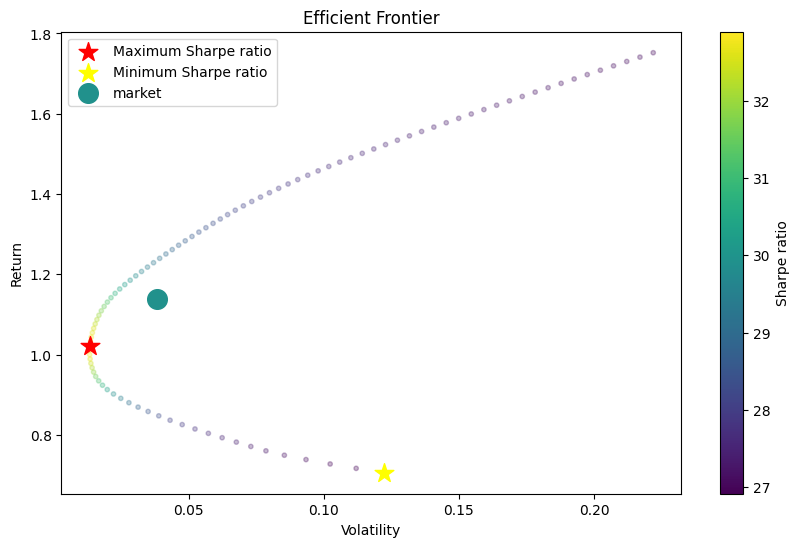

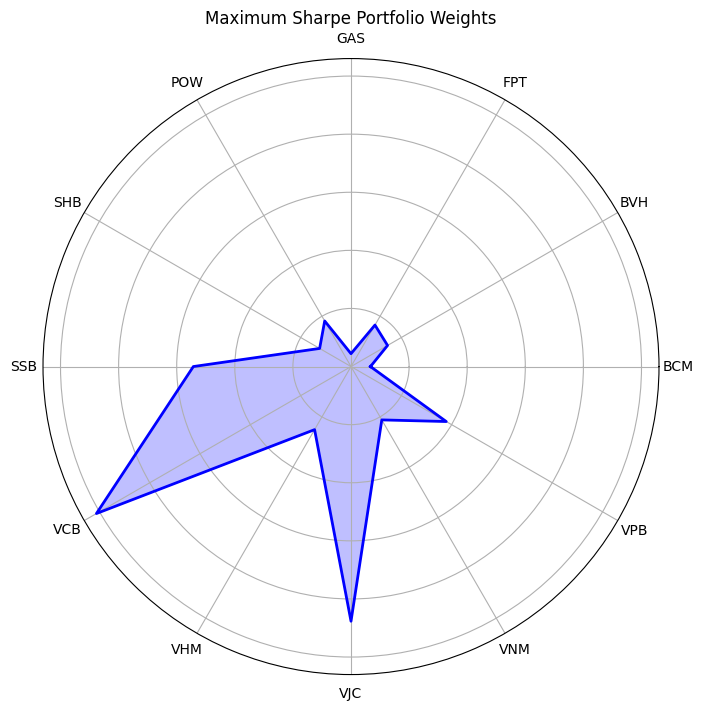

{'BCM': np.float64(0.01674575652470702), 'BVH': np.float64(0.036330372251981054), 'FPT': np.float64(0.04124758893773609), 'GAS': np.float64(0.01107866369625899), 'POW': np.float64(0.0452806560668975), 'SHB': np.float64(0.031173095738756113), 'SSB': np.float64(0.13567099927383897), 'VCB': np.float64(0.25297161996468076), 'VHM': np.float64(0.06268925427480568), 'VJC': np.float64(0.21917196041859138), 'VNM': np.float64(0.053016559431753166), 'VPB': np.float64(0.09462347341999344)}


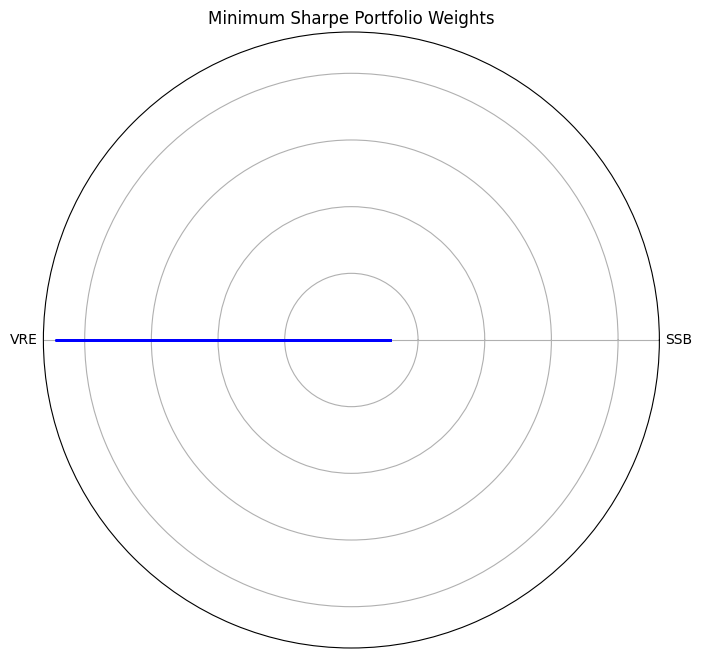

{'SSB': np.float64(0.11461864686589628), 'VRE': np.float64(0.8853813531341039)}


In [ ]:
result, market_stat = efficient_frontier(
    returns_df, market_df, num_portfolios=100, range0=(0, 1)
)
if result is not None:
    # Get the weights from the Maximum Sharpe portfolio that only show the stock with 0.01% scale
    plot_portfolio_weights(
        result["Maximum Sharpe"]["Weights"], title="Maximum Sharpe Portfolio Weights"
    )
    plot_portfolio_weights(
        result["Minimum Sharpe"]["Weights"], title="Minimum Sharpe Portfolio Weights"
    )
else:
    print("Could not calculate efficient frontier. Please check your input data.")

### With Constrain for each stock to be at least 1% of whole portfolio

Results array shape: (69, 33)


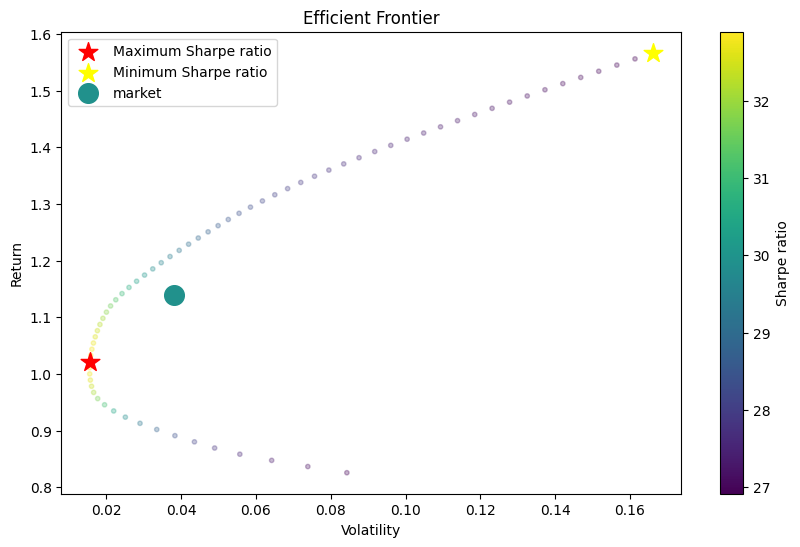

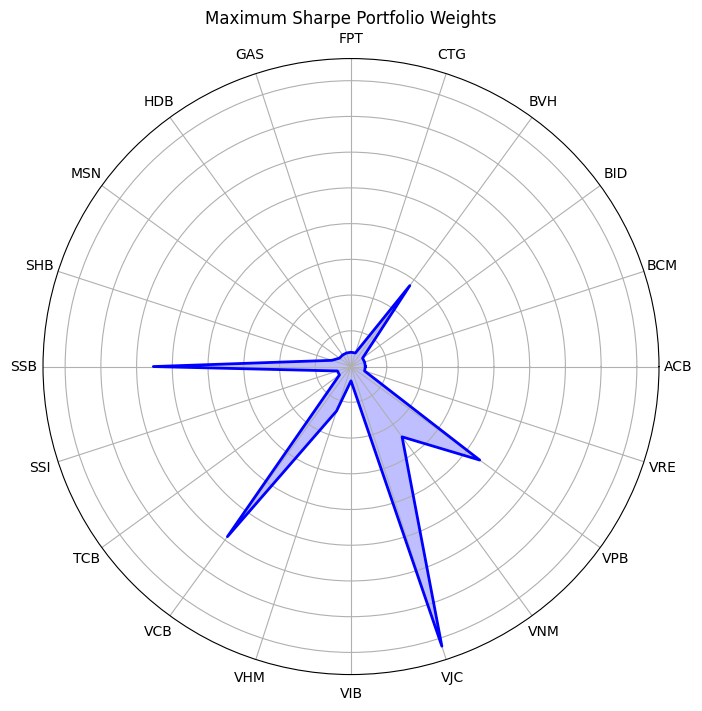

{'ACB': np.float64(0.010000000000000007), 'BCM': np.float64(0.010000000000000009), 'BID': np.float64(0.010000000000000009), 'BVH': np.float64(0.07000613311273997), 'CTG': np.float64(0.010000000000000005), 'FPT': np.float64(0.01000000000000004), 'GAS': np.float64(0.010000000000000037), 'HDB': np.float64(0.010000000000000004), 'MSN': np.float64(0.01000000000000001), 'SHB': np.float64(0.014102473507603925), 'SSB': np.float64(0.13830488597629143), 'SSI': np.float64(0.010000000000000018), 'TCB': np.float64(0.01000000000000001), 'VCB': np.float64(0.14709712001562486), 'VHM': np.float64(0.032682409160536406), 'VIB': np.float64(0.010000000000000005), 'VJC': np.float64(0.20570504998250416), 'VNM': np.float64(0.060796688752540906), 'VPB': np.float64(0.11130523949215827), 'VRE': np.float64(0.010000000000000005)}


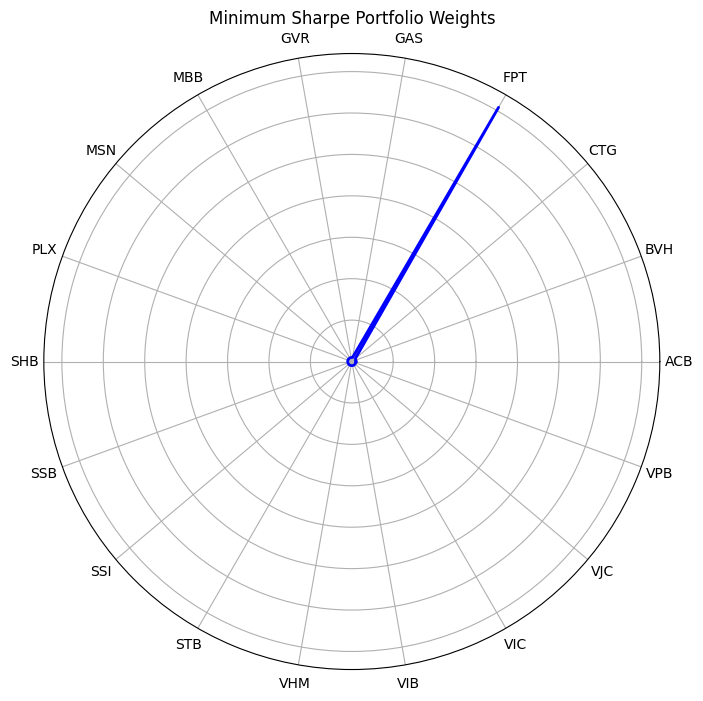

{'ACB': np.float64(0.010000000000000049), 'BVH': np.float64(0.010000000000000064), 'CTG': np.float64(0.011318047928867784), 'FPT': np.float64(0.7086819520711322), 'GAS': np.float64(0.01000000000000001), 'GVR': np.float64(0.010000000000000082), 'MBB': np.float64(0.010000000000000002), 'MSN': np.float64(0.010000000000000023), 'PLX': np.float64(0.010000000000000089), 'SHB': np.float64(0.010000000000000047), 'SSB': np.float64(0.01000000000000013), 'SSI': np.float64(0.010000000000000012), 'STB': np.float64(0.01000000000000001), 'VHM': np.float64(0.010000000000000054), 'VIB': np.float64(0.01000000000000001), 'VIC': np.float64(0.010000000000000026), 'VJC': np.float64(0.010000000000000016), 'VPB': np.float64(0.010000000000000009)}


In [8]:
# with minimum weight of stock is 1%
result, market_stat = efficient_frontier(
    returns_df, market_df, num_portfolios=100,  range0=(0.01, 1)
)
if result is not None:
    # Get the weights from the Maximum Sharpe portfolio
    plot_portfolio_weights(
        result["Maximum Sharpe"]["Weights"], title="Maximum Sharpe Portfolio Weights"
    )
    plot_portfolio_weights(
        result["Minimum Sharpe"]["Weights"], title="Minimum Sharpe Portfolio Weights"
    )
else:
    print("Could not calculate efficient frontier. Please check your input data.")

## VN100

In [9]:
df = stock_data[
    (stock_data["market_value"] > 0)
    & (stock_data["time"].dt.year == 2024)
    & (stock_data["ticker"].str.len() == 3)
    & (stock_data["ticker"].isin(index_l["VN100"]))
]
# makes sure to only use stocks that have market value > 0
weights = df.pivot_table(index="time", values="market_value", columns="ticker")
weights.dropna(axis=1, inplace=True)
weights = weights.div(weights.sum(axis=0), axis=1)

returns_df = df[df["ticker"].isin(weights.columns)].pivot_table(
    index="time", values="log_return", columns="ticker"
)

Results array shape: (96, 102)


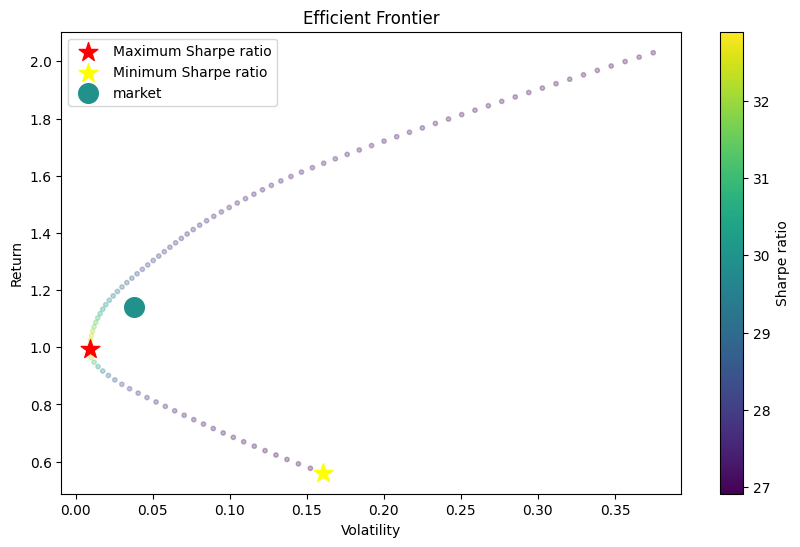

In [10]:
result, market_port = efficient_frontier(
    returns_df, market_df, num_portfolios=100, risk_free_rate=0.01, range0=(0, 1)
)
# it can be seen that with larger number of stock in the given portfolio, the max sharp and min sharp posion is just the same what we learned in the investment class.

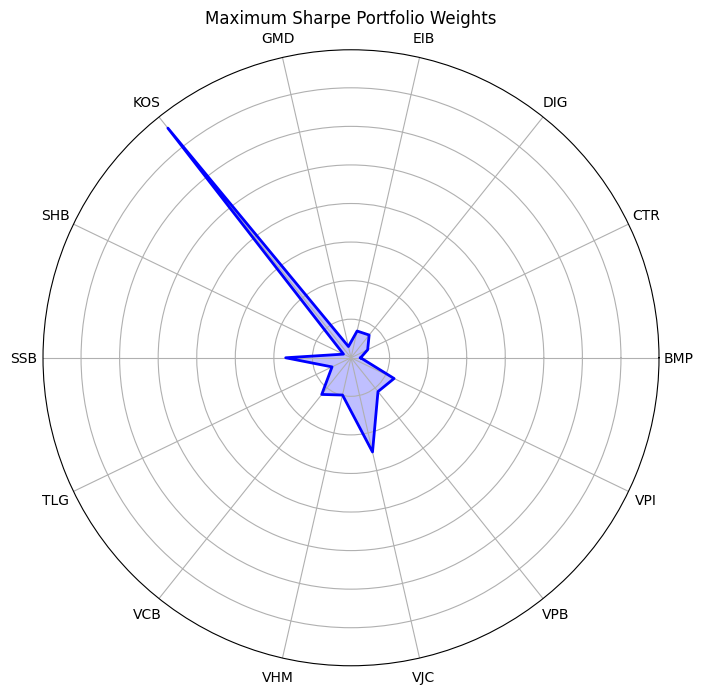

{'BMP': np.float64(0.012430108983191508), 'CTR': np.float64(0.023979055701884404), 'DIG': np.float64(0.03770383970148623), 'EIB': np.float64(0.035548638284427336), 'GMD': np.float64(0.014923652046746777), 'KOS': np.float64(0.380822360591723), 'SHB': np.float64(0.010841322732195445), 'SSB': np.float64(0.08467208768571417), 'TLG': np.float64(0.027324813407736247), 'VCB': np.float64(0.06082725686021527), 'VHM': np.float64(0.049541982300404415), 'VJC': np.float64(0.12527248760635865), 'VPB': np.float64(0.05609071744147133), 'VPI': np.float64(0.061966637868410286)}


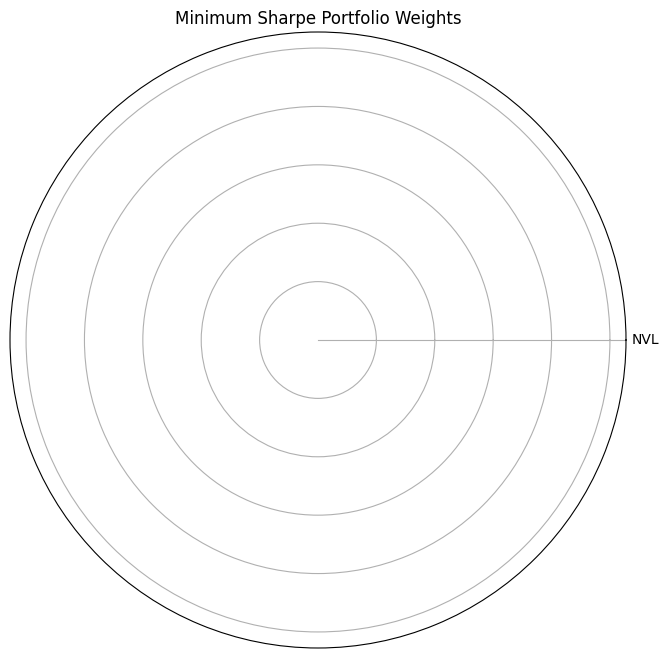

{'NVL': np.float64(0.9999999997075334)}


In [11]:
if result is not None:
    # Get the weights from the Maximum Sharpe portfolio
    plot_portfolio_weights(
        result["Maximum Sharpe"]["Weights"], title="Maximum Sharpe Portfolio Weights"
    )
    plot_portfolio_weights(
        result["Minimum Sharpe"]["Weights"], title="Minimum Sharpe Portfolio Weights"
    )
else:
    print("Could not calculate efficient frontier. Please check your input data.")

## HSX

In [12]:
df = stock_data[
    (stock_data["market_value"] > 0)
    & (stock_data["time"].dt.year == 2024)
    & (stock_data["ticker"].str.len() == 3)
    & (stock_data["exchange"] == "HSX")
]
# makes sure to only use stocks that have market value > 0
weights = df.pivot_table(index="time", values="market_value", columns="ticker")
weights.dropna(axis=1, inplace=True)
weights = weights.div(weights.sum(axis=0), axis=1)

returns_df = df[df["ticker"].isin(weights.columns)].pivot_table(
    index="time", values="log_return", columns="ticker"
)

Results array shape: (84, 294)


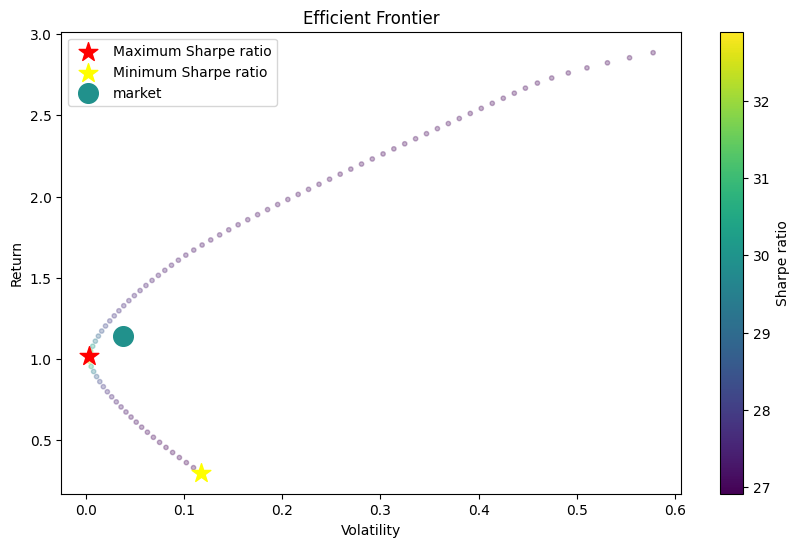

In [13]:
result, market_port = efficient_frontier(
    returns_df, market_df, num_portfolios=100, risk_free_rate=0.01, range0=(0, 1)
)

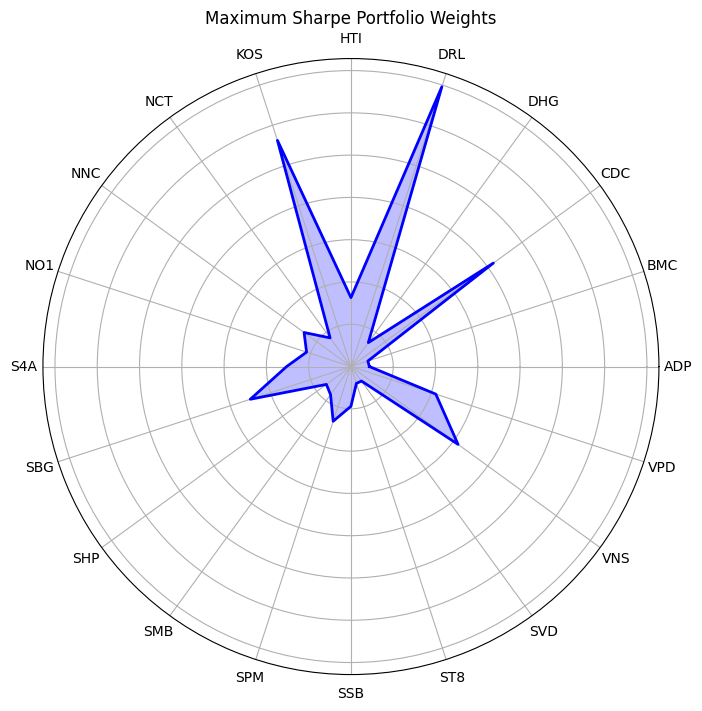

{'ADP': np.float64(0.01090089674121834), 'BMC': np.float64(0.010508567792121608), 'CDC': np.float64(0.10408481967459145), 'DHG': np.float64(0.017488248082582418), 'DRL': np.float64(0.17393992223186522), 'HTI': np.float64(0.04074851779288137), 'KOS': np.float64(0.14062177716770824), 'NCT': np.float64(0.02096456465496459), 'NNC': np.float64(0.034253861298760596), 'NO1': np.float64(0.027581490863899466), 'S4A': np.float64(0.03804297671833994), 'SBG': np.float64(0.0625734441714934), 'SHP': np.float64(0.01794657550382809), 'SMB': np.float64(0.020521837639439447), 'SPM': np.float64(0.03400916395788349), 'SSB': np.float64(0.02348572357863121), 'ST8': np.float64(0.010469436636328116), 'SVD': np.float64(0.010605651259717573), 'VNS': np.float64(0.07828085807931251), 'VPD': np.float64(0.052768151228782256)}


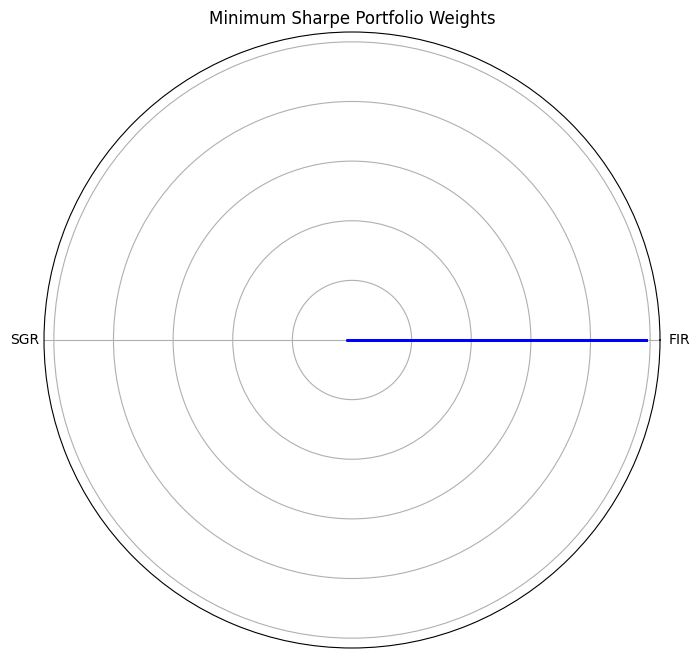

{'FIR': np.float64(0.9845776442485661), 'SGR': np.float64(0.015422355751435485)}


In [14]:
if result is not None:
    # Get the weights from the Maximum Sharpe portfolio
    plot_portfolio_weights(
        result["Maximum Sharpe"]["Weights"], title="Maximum Sharpe Portfolio Weights"
    )
    plot_portfolio_weights(
        result["Minimum Sharpe"]["Weights"], title="Minimum Sharpe Portfolio Weights"
    )
else:
    print("Could not calculate efficient frontier. Please check your input data.")